# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import matplotlib.patches as mpatches 
import time
import json
import random
from scipy.stats import linregress
import os
from api_keys import weather_api_key


# Import API key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [3]:

#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city

#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Get the temperature from the response
#print(weather_json)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

563

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set lists for the dataframe

#city_two = []
#cloudiness = []
#dates = []
#humidities = []
#lats = []
#lngs = []
#max_temps = []
#feels_like = []
#wind_speeds = []
#countries = []
#name = []
#i_d = []
# set initial count quantities for organization
#count_one = 0
#set_one = 1

# loops for creating dataframe columns
#for city in cities:
#    try:
#        #response = requests.get(query_url + city.replace(" ","&")).json()
#        response = requests.get(query_url + city).json()
#        cloudiness.append(response['clouds']['all'])
#        countries.append(response['sys']['country'])
#        dates.append(response['dt'])
#        humidities.append(response['main']['humidity'])
#        lats.append(response['coord']['lat'])
#        lngs.append(response['coord']['lon'])
#        max_temps.append(response['main']['temp_max'])
#        feels_like.append(response['main']['feels_like'])
#        wind_speeds.append(response['wind']['speed'])
#        name.append(response['name'])
#        i_d.append(response['City ID'])
#        if count_one > 48:
#            count_one = 1
#            set_one += 1
#            city_two.append(city)
#        else:
#            count_one += 1
#            city_two.append(city)
#        print(f"Processing Record {count_one} of Set {set_one} | {city}")
#    except Exception:
#        print("City not found. Skipping...")
#print("------------------------------\nData Retrieval Complete\n------------------------------")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# create dictionary for establishing dataframe
#weather_dict = {
#    "City":city_two,
#    "Cloudiness":cloudiness,
#    "Country":countries,
#    "Date":dates,
#    "Humidity":humidities,
#    "Lat":lats,
#    "Lng":lngs,
#    "Max Temp":max_temps,
#    "Wind Speed":wind_speeds,
#    "Feels like":feels_like,
#    "Name":name}

# create dataframe
#weather_dataframe = pd.DataFrame(weather_dict)
#weather_dataframe.head()

# output data to csv
#weather_dataframe.to_csv('output_data/cities_1.csv')

# This code is here so that I can continue to tweak my graphs and the rest of my code without doing a new api call every time
weather_df = pd.read_csv('../output_data/cities.csv')

In [27]:
# Get a lay of the land
weather_df.count()

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [28]:
# Show the dataframe
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

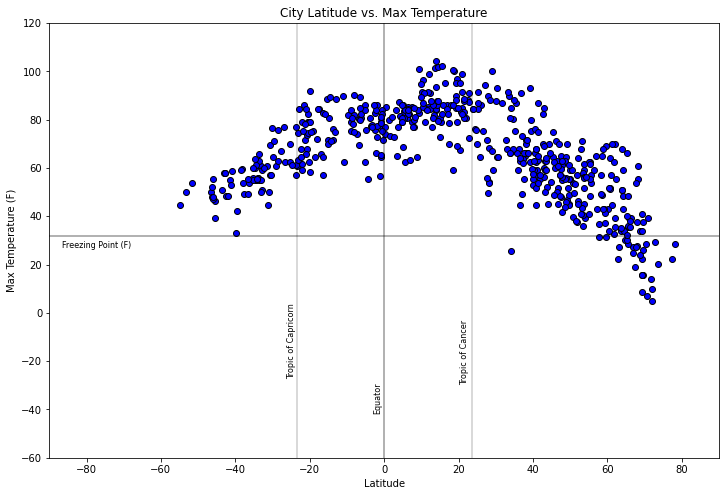

In [29]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-60, 120)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.axhline(32, c='k', alpha=.4)
plt.title('City Latitude vs. Max Temperature')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.gcf().text(.14, .49, 'Freezing Point (F)', fontsize=8, rotation='horizontal')
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

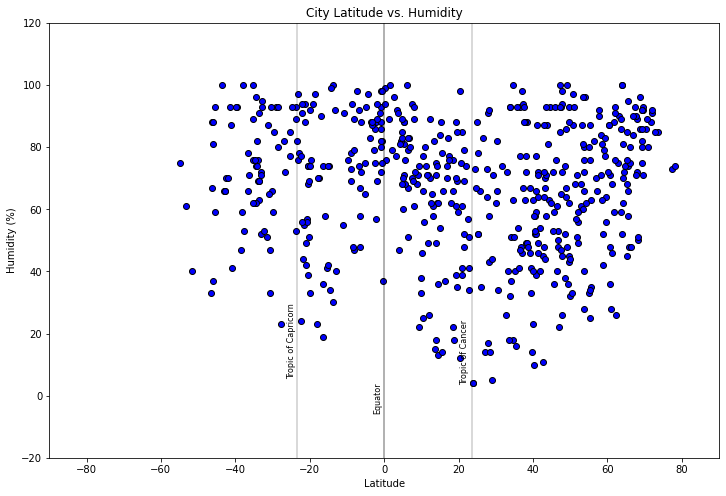

In [30]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Humidity')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

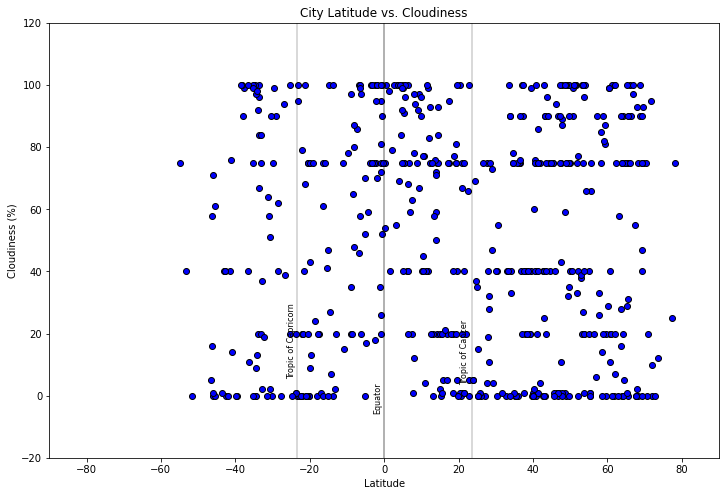

In [31]:
# create graph
plt.figure(figsize = (12, 8))                                               
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Cloudiness')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

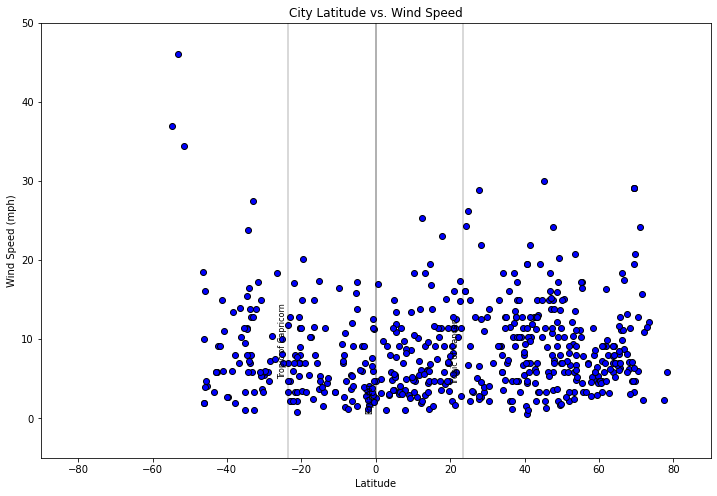

In [32]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Wind Speed')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [15]:

# Create Northern and Southern Hemisphere DataFrames
northernHem_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southernHem_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.82x + 95.11
The r-squared is: -0.815165740681083


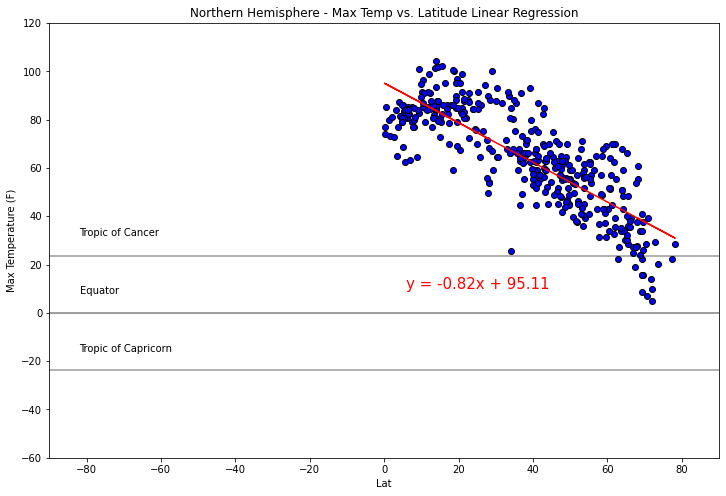

In [16]:
# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(northernHem_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig6.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.68x + 82.78
The r-squared is: 0.7602633550516461


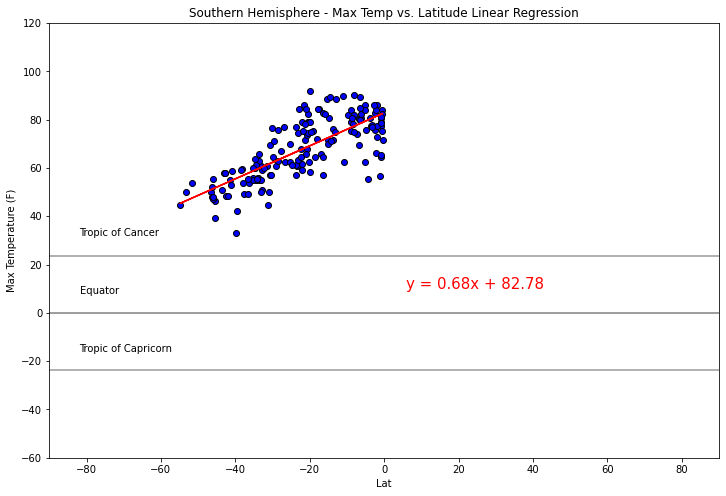

In [17]:
# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(southernHem_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig7.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.11x + 60.85
The r-squared is: 0.10358336015746496


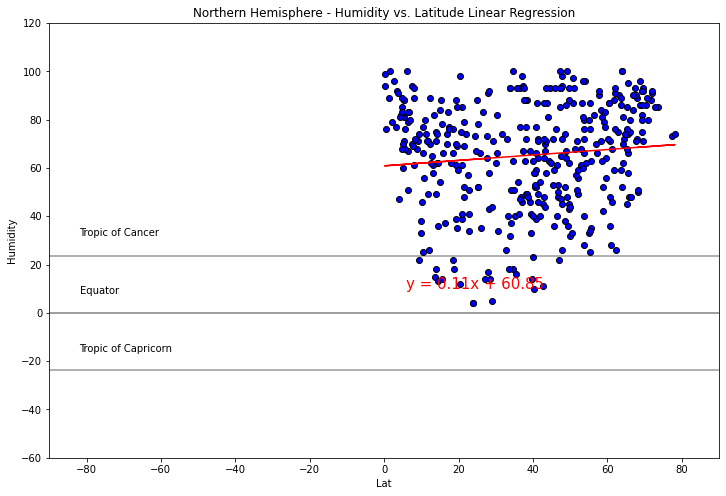

In [18]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(northernHem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig8.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 79.32
The r-squared is: 0.14689473425583055


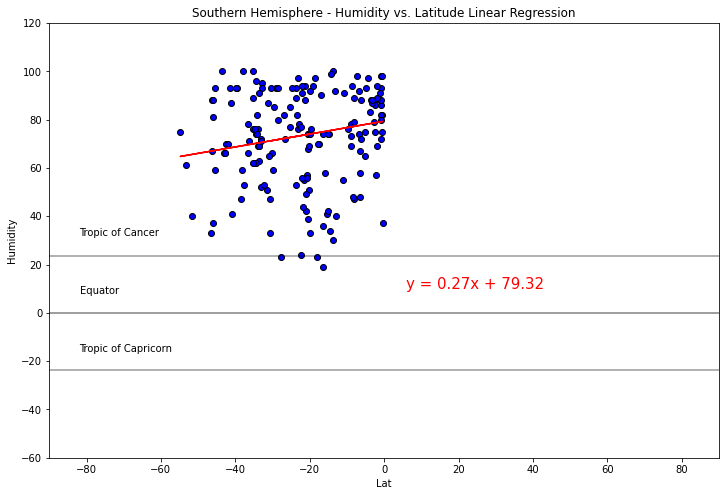

In [19]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(southernHem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig9.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 55.94
The r-squared is: -0.08733547918934016


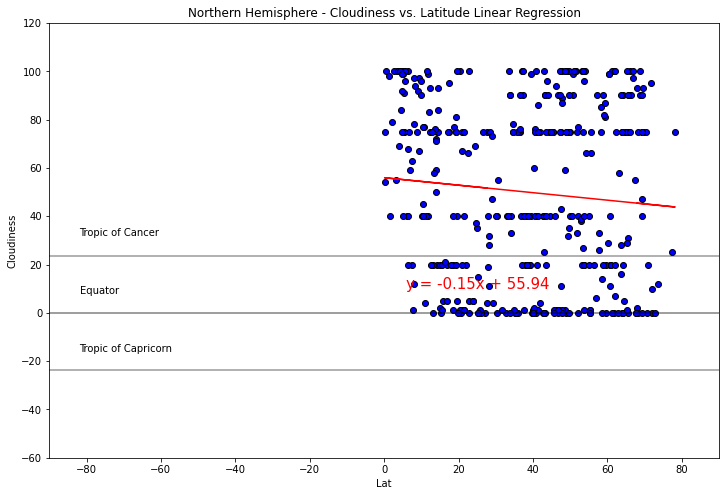

In [20]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(northernHem_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig10.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.58x + 60.96
The r-squared is: 0.21881426893991618


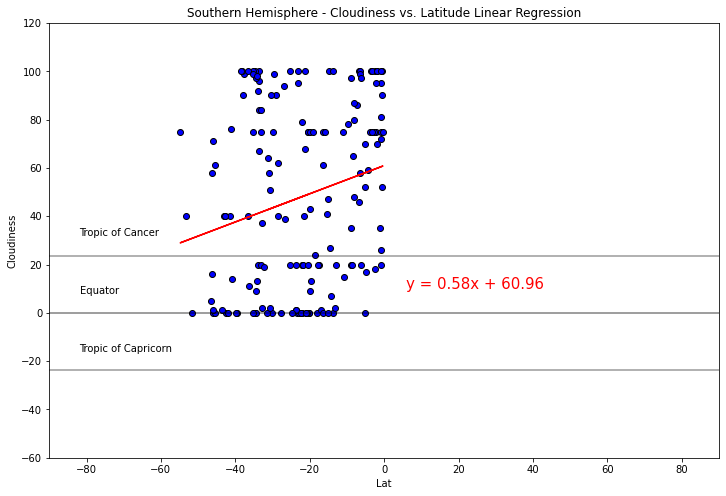

In [21]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(southernHem_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig11.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 7.79
The r-squared is: 0.10713827743884795


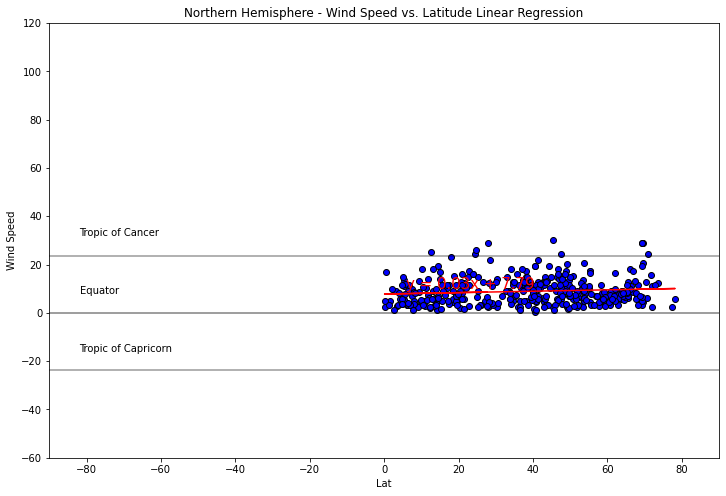

In [22]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(northernHem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig12.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 4.91
The r-squared is: -0.32248307713953794


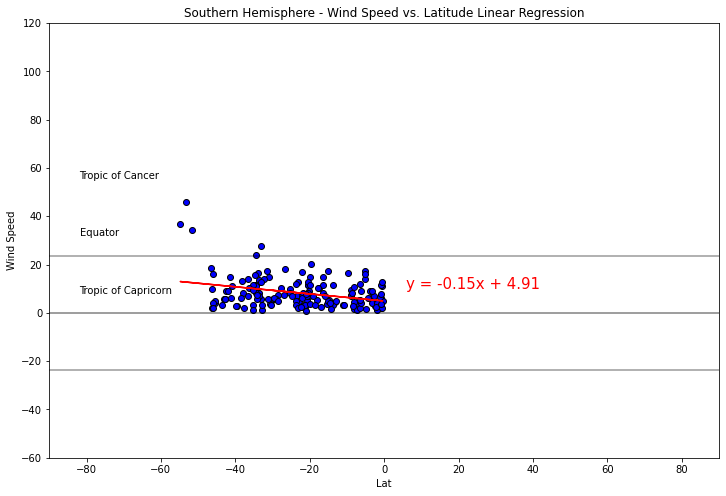

In [23]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southernHem_df['Lat']).astype(float)
y_values = pd.to_numeric(southernHem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("fig13.png")
plt.show()